In [63]:
import autograd.numpy as np
import matplotlib.pyplot as plt
import ssm
import pickle
import os
import itertools
from ssm.util import compute_state_overlap, find_permutation
from scipy.optimize import linear_sum_assignment

%matplotlib inline

In [29]:
DATA_PATH = '../data/processed/lem_95-100_20210103143715/'
files = os.listdir(DATA_PATH)
all_data = [pickle.load(open(DATA_PATH + x,'rb')) for x in files]
models = [d[2] for x in all_data for d in x]
posteriors = [d[1] for x in all_data for d in x]

Y_PATH = '../scripts/gcp/data/train_test_95-100.pkl'
[y_train, y_test] = pickle.load(open(Y_PATH, 'rb'))

In [62]:
overlaps = []
for pair in itertools.combinations(range(len(models)),2):
    print(pair)
    m1 = models[pair[0]]
    m2 = models[pair[1]]
    p1 = posteriors[pair[0]]
    p2 = posteriors[pair[1]]
    print('continuous states')
    q1_x = p1.mean_continuous_states[0]
    q2_x = p2.mean_continuous_states[0]
    print('discrete states')
    q1_z = m1.most_likely_states(q1_x, y_train)
    q2_z = m2.most_likely_states(q2_x, y_train)
    print('overlap')
    overlap = compute_state_overlap(q1_z, q2_z)
    perm = linear_sum_assignment(-overlap)
    overlaps.append({'overlap': overlap,
                      'permutation': perm,
                        'trace_stat': overlap[perm[0],perm[1]].sum() / overlap.sum()})
    


(0, 1)
continuous states
discrete states
overlap
(0, 2)
continuous states
discrete states
overlap
(0, 3)
continuous states
discrete states
overlap
(0, 4)
continuous states
discrete states
overlap
(0, 5)
continuous states
discrete states
overlap
(0, 6)
continuous states
discrete states
overlap
(0, 7)
continuous states
discrete states
overlap
(0, 8)
continuous states
discrete states
overlap
(0, 9)
continuous states
discrete states
overlap
(0, 10)
continuous states
discrete states
overlap
(0, 11)
continuous states
discrete states
overlap
(0, 12)
continuous states
discrete states
overlap
(0, 13)
continuous states
discrete states
overlap
(0, 14)
continuous states
discrete states
overlap
(0, 15)
continuous states
discrete states
overlap
(0, 16)
continuous states
discrete states
overlap
(0, 17)
continuous states
discrete states
overlap
(0, 18)
continuous states
discrete states
overlap
(0, 19)
continuous states
discrete states
overlap
(0, 20)
continuous states
discrete states
overlap
(0, 21)
c

Now, we can tell if we are likely in the same mode if the table isn't "spread out" - that is, per row/column, one entry has most of the mass, while the other entries are close to zero. Furthermore, there should be a permutation of the columns such that these masses will all be on the diagonal, so that we can test what fraction of the trace should be on the 

In [71]:
stats = np.array([x['trace_stat'] for x in overlaps])

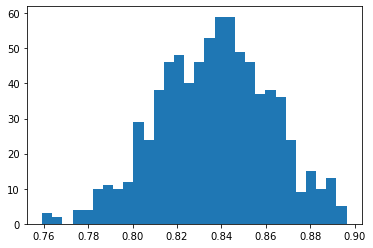

In [72]:
plt.hist(stats, bins=30)
plt.show()

In [73]:
stats.mean()

0.836595736419058

In [76]:
stats.std()

0.02530351498463579